In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [42]:
data = pd.read_csv('uber_stock_data-Copy.csv')
print(data.shape)
print(data.info())
data.head(10)

(1444, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1444 non-null   object 
 1   Adj Close  1400 non-null   float64
 2   Close      1444 non-null   float64
 3   High       1444 non-null   float64
 4   Low        1444 non-null   float64
 5   Open       1444 non-null   float64
 6   Volume     1444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB
None


,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500
5,2019-05-17,41.910000,41.910000,43.290001,41.270000,41.980000,20225700
6,2019-05-20,41.590000,41.590000,41.680000,39.459999,41.189999,29222300
7,2019-05-21,41.500000,41.500000,42.240002,41.250000,42.000000,10802900
8,2019-05-22,41.250000,41.250000,41.279999,40.500000,41.049999,9089500
9,2019-05-23,40.470001,40.470001,41.090000,40.020000,40.799999,11119900


In [43]:
min_val = data['Volume'].min()
max_val = data['Volume'].max()
data['Volume'] = 20 + ((data['Volume'] - min_val) / (max_val - min_val)) * 70
data = data.drop('Date', axis=1)
data.head(10)

,Adj Close,Close,High,Low,Open,Volume
0,41.570000,41.570000,45.000000,41.060001,42.000000,55.488184
1,37.099998,37.099998,39.240002,36.080002,38.790001,34.754999
2,39.959999,39.959999,39.959999,36.849998,38.310001,28.395904
3,41.290001,41.290001,41.880001,38.950001,39.369999,26.344508
4,43.000000,43.000000,44.060001,41.250000,41.480000,26.738182
5,41.910000,41.910000,43.290001,41.270000,41.980000,23.267821
6,41.590000,41.590000,41.680000,39.459999,41.189999,25.013030
7,41.500000,41.500000,42.240002,41.250000,42.000000,21.439935
8,41.250000,41.250000,41.279999,40.500000,41.049999,21.107560
9,40.470001,40.470001,41.090000,40.020000,40.799999,21.501428


In [44]:
data.isnull().sum() / len(data) * 100

Adj Close    3.047091
Close        0.000000
High         0.000000
Low          0.000000
Open         0.000000
Volume       0.000000
dtype: float64

In [45]:
ac_mean = np.mean(data['Adj Close'])
data.loc[data.loc[:, 'Adj Close'].isna(), 'Adj Close'] = ac_mean
ac_mean

np.float64(44.45505001335714)

In [46]:
def numeric(temp):
    print("Count =", len(temp))
    print("Sum =", sum(temp))
    print("Range =", max(temp) - min(temp))
    print("Min =", min(temp))
    print("Max =", max(temp))
    print("Mean =", st.mean(temp))
    print("Median =", st.median(temp))
    print("Variance =", st.variance(temp))
    print("Standard Deviation =", np.std(temp))
for column in data.columns:
    print(f"Column: {column}")
    numeric(data[column])
    print("-" * 100)

Column: Adj Close
Count = 1444
Sum = 64193.09221928771
Range = 71.51999665
Min = 14.81999969
Max = 86.33999634
Mean = 44.455050013357145
Median = 41.405000689999994
Variance = 242.84568013717615
Standard Deviation = 15.578109784515282
----------------------------------------------------------------------------------------------------
Column: Close
Count = 1444
Sum = 64208.00002281
Range = 71.51999665
Min = 14.81999969
Max = 86.33999634
Mean = 44.46537397701523
Median = 41.35500145
Variance = 243.18099180820852
Standard Deviation = 15.588860892289233
----------------------------------------------------------------------------------------------------
Column: High
Count = 1444
Sum = 65395.16608429
Range = 69.20000076
Min = 17.79999924
Max = 87.0
Mean = 45.287511138704986
Median = 41.90999985
Variance = 247.77355643331714
Standard Deviation = 15.735373147715215
----------------------------------------------------------------------------------------------------
Column: Low
Count = 1444
Sum 

In [47]:
for column in data.columns:
    print(f"Column: {column}")
    print("Unique Values:", data[column].unique())
    print("-" * 100)

Column: Adj Close
Unique Values: [41.56999969 37.09999847 39.95999908 ... 67.29000092 69.75
 64.48000336]
----------------------------------------------------------------------------------------------------
Column: Close
Unique Values: [41.56999969 37.09999847 39.95999908 ... 67.29000092 69.75
 64.48000336]
----------------------------------------------------------------------------------------------------
Column: High
Unique Values: [45.         39.24000168 39.95999908 ... 68.84999847 70.19000244
 66.75      ]
----------------------------------------------------------------------------------------------------
Column: Low
Unique Values: [41.06000137 36.08000183 36.84999847 ... 65.1780014  67.69000244
 63.5       ]
----------------------------------------------------------------------------------------------------
Column: Open
Unique Values: [42.         38.79000092 38.31000137 ... 67.08999634 65.30000305
 67.69000244]
--------------------------------------------------------------------

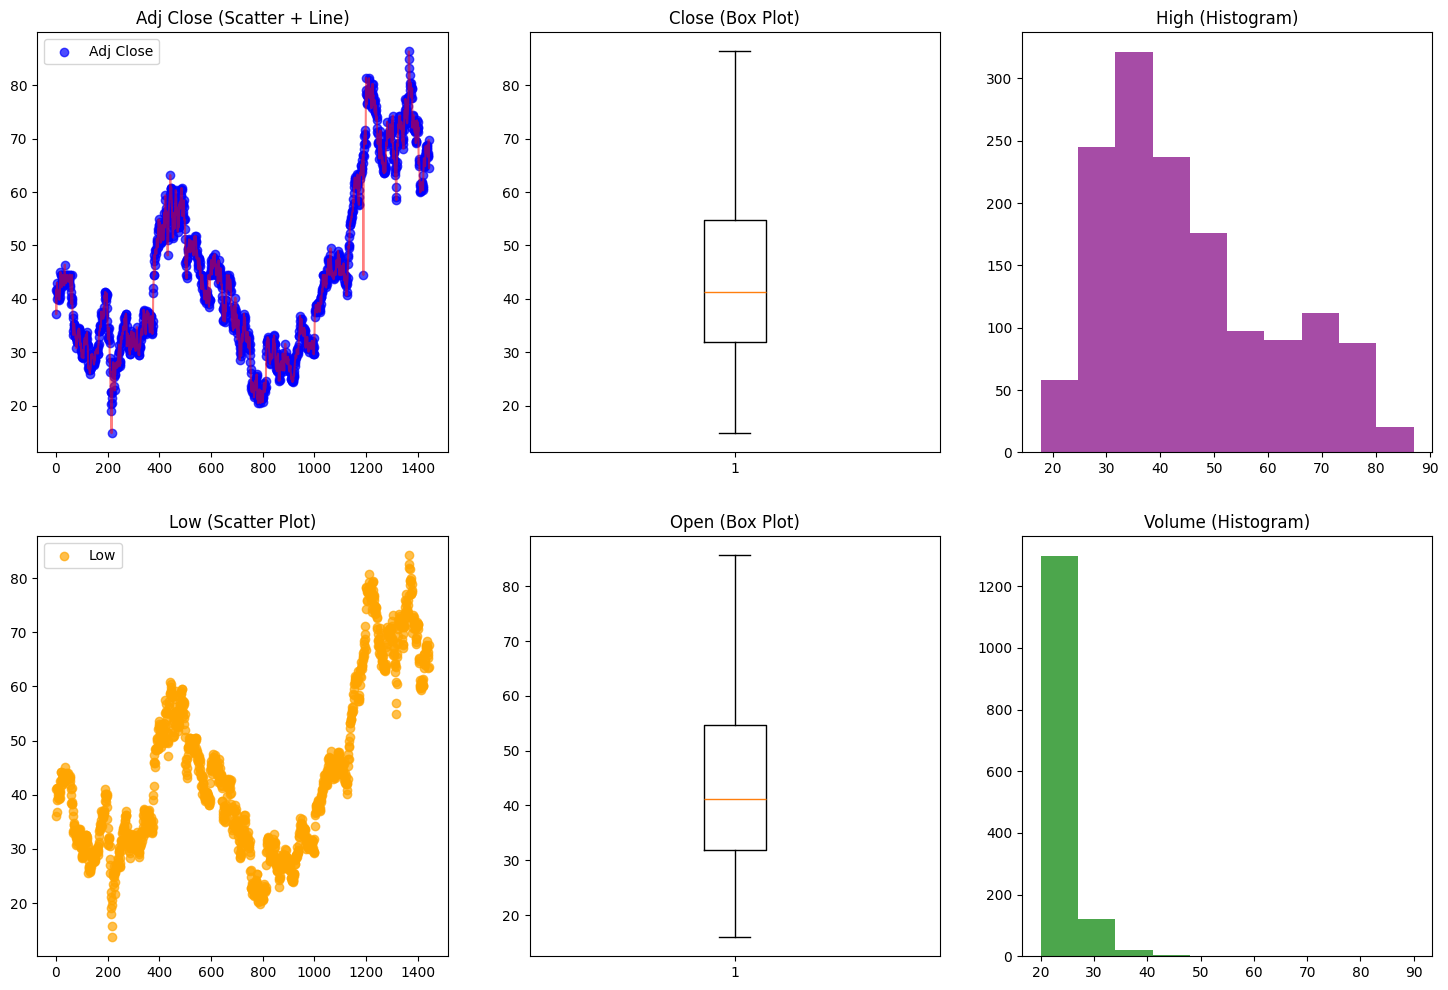

In [48]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.scatter(range(len(data)), data['Adj Close'], color='blue', alpha=0.7, label='Adj Close')
plt.plot(range(len(data)), data['Adj Close'], 'r-', alpha=0.5)
plt.title('Adj Close (Scatter + Line)')
plt.legend()

plt.subplot(2, 3, 2)
plt.boxplot(data['Close'])
plt.title('Close (Box Plot)')

plt.subplot(2, 3, 3)
plt.hist(data['High'], bins=10, color='purple', alpha=0.7)
plt.title('High (Histogram)')

plt.subplot(2, 3, 4)
plt.scatter(range(len(data)), data['Low'], color='orange', alpha=0.7, label='Low')
plt.title('Low (Scatter Plot)')
plt.legend()

plt.subplot(2, 3, 5)
plt.boxplot(data['Open'])
plt.title('Open (Box Plot)')

plt.subplot(2, 3, 6)
plt.hist(data['Volume'], bins=10, color='green', alpha=0.7)
plt.title('Volume (Histogram)')

plt.show()


In [49]:
x = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [50]:
knn = KNeighborsRegressor(n_neighbors=4, p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nTest MSE with k=4 and Manhattan distance: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Current Model MAPE: {mape:.2f}%")


Test MSE with k=4 and Manhattan distance: 6.0647
R2 Score: 0.1004
Mean Absolute Error: 1.6109
Root Mean Squared Error: 2.4627
Current Model MAPE: 6.48%
